In [ ]:
# Name : Utkarsh Trivedi - ENGI 9861 HPCA Python Program 
# Email : ubtrivedi@mun.ca 
# Using LSTM to predict stock prices of a company  
# For analysis I would be targeting the top 5 megacap companies which are Apple (AAPL), Microsoft(MSFT), Amazon(AMZN), Google(GOOGL) and Facebook(FB) as of 31/07/2020
# Version : 5.2 (Last modified 31//07/2020)

In [ ]:
#Importing all Python libraries
import datetime
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as mplt

#Getting stock price from yahoo 
stock = input("Enter the stock symbol: ")
dataframe = pdr.DataReader(stock, data_source='yahoo', start='2010-01-01', end='2020-07-29') 
dataframe

Enter the stock symbol: MSFT


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.226894
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.234720
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.085989
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.835503
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.999893
...,...,...,...,...,...,...
2020-07-23,210.919998,202.149994,207.190002,202.539993,67457000.0,202.539993
2020-07-24,202.860001,197.509995,200.419998,201.300003,39827000.0,201.300003
2020-07-27,203.970001,200.860001,201.470001,203.850006,30160900.0,203.850006


In [ ]:
# Getting the shape of our data frame
dataframe.shape

(2661, 6)

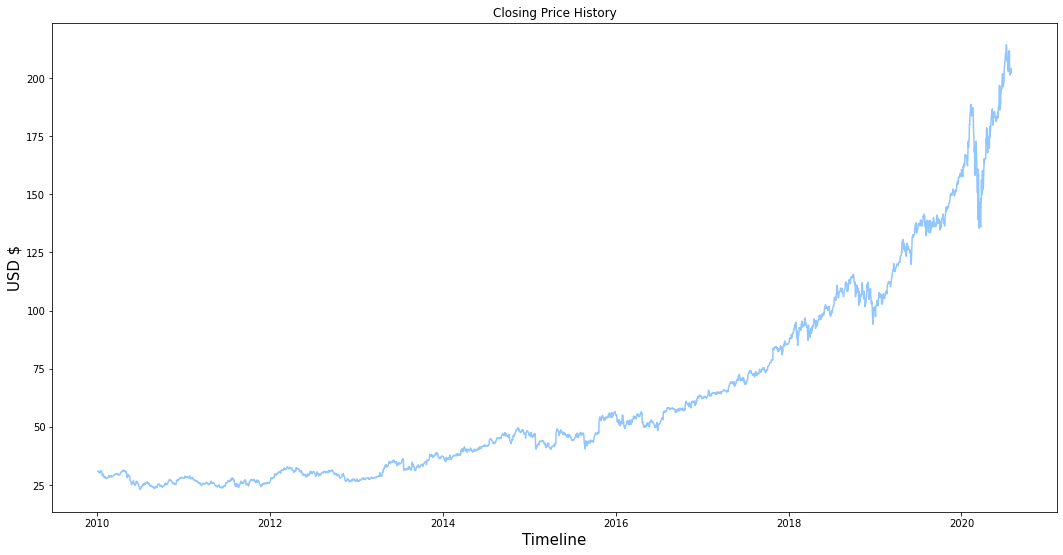

In [ ]:
#Creating a graph to visualize the closing price history
mplt.style.use('seaborn-pastel')
mplt.figure(figsize=(18,9))
mplt.title('Closing Price History')
mplt.xlabel('Timeline',fontsize=15)
mplt.ylabel('USD $',fontsize=15)
mplt.plot(dataframe['Close'])
mplt.show()

In [ ]:
#Creating a new dataframe with only the 'Close' column from the available data
data = dataframe.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#Creating a variable to store the length of the training dataset 
#We could ideally take 60 to 90 % of data from set for training
#In our case we are taking 85 % of dataset for training 
training_data_length = math.ceil( len(dataset) *.85) 

#Scaling all the values of data inbetween 0 and 1
#Scaling is done inorder to feed data better to a neural network
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_length  , : ]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(120,len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 120:
      print(x_train)
      print(y_train)
      print()

[array([0.04150332, 0.04155558, 0.04056244, 0.03888976, 0.03998745,
       0.03794888, 0.03690345, 0.03836705, 0.04155558, 0.04103288,
       0.04228739, 0.03962155, 0.03658983, 0.03110135, 0.03298311,
       0.033924  , 0.03481261, 0.03214677, 0.0270242 , 0.02822644,
       0.02848779, 0.0293764 , 0.02524698, 0.02618786, 0.02461972,
       0.02613559, 0.02603105, 0.02671058, 0.02571742, 0.02791281,
       0.02916732, 0.03115362, 0.0301082 , 0.02989911, 0.02780827,
       0.0293764 , 0.02921959, 0.02958549, 0.03141498, 0.02848779,
       0.02848779, 0.0293764 , 0.02916732, 0.0293764 , 0.03026501,
       0.03115362, 0.03225132, 0.03272176, 0.03282631, 0.03324447,
       0.03460352, 0.03449898, 0.03439444, 0.03444671, 0.0359103 ,
       0.03470806, 0.03658983, 0.03476033, 0.03439444, 0.03533532,
       0.03282631, 0.03214677, 0.03272176, 0.03298311, 0.03313993,
       0.03611939, 0.03831478, 0.03821023, 0.03888976, 0.04082379,
       0.04108515, 0.04003972, 0.04197376, 0.04364644, 0.0434

In [ ]:
#Convert x_train (independant train dataset) and y_train (dependant train dataset) to numpy arrays
# Conversion is done inorder to use them in LSTM network model
x_train, y_train = np.array(x_train), np.array(y_train)

#Coverting the data to three dimension form (samples , timesteps, features) which can be used in LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Constructing the LSTM network model
#Two LSTM layers with 200 neurons each and two dense layers in which one is 100 neurons and other is 1 neuron respectively 
model = Sequential()
model.add(LSTM(units=200, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=200, return_sequences=False))
model.add(Dense(units=75))
model.add(Dense(units=1))

In [ ]:
#Compiling the LSTM model using Adam and  Nadam optimizer and mean squared error method
model.compile(optimizer='Nadam', loss='mean_squared_error')

In [ ]:
#Model Training
#Batch size contains the total number of training samples in one batch
#Epoch is the number of iterations when an entire dataset is passed forward or backward
model.fit(x_train, y_train, batch_size=8, epochs=2)

Epoch 1/2
268/268 [==============================] - 98s 367ms/step - loss: 5.4990e-04
Epoch 2/2
268/268 [==============================] - 100s 371ms/step - loss: 1.5091e-04


In [ ]:
#Creating a test data set
test_data = scaled_data[training_data_length - 120: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_length : , : ] 
for i in range(120,len(test_data)):
    x_test.append(test_data[i-120:i,0])

#Convert independant x_test array to a numpy array to use it in LSTM model
x_test = np.array(x_test)

#Reshaping in to the three dimensional data (samples , timesteps, features) accepted by the LSTM 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Using the test data getting the models predicted price values
predictions = model.predict(x_test) 

#Reversing back by undoing the scaling
predictions = scaler.inverse_transform(predictions)

#Calculating the root mean square value and getting its value as output
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse


4.768976151187155

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


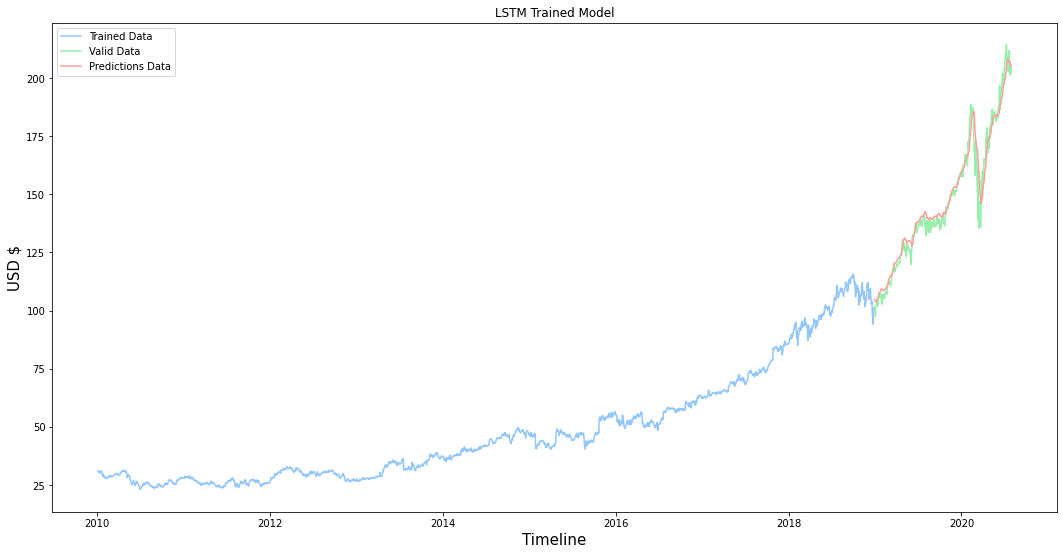

In [ ]:
#Plotting and visualizing the data for the graph
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

#Visualize the data
mplt.figure(figsize=(18,9))
mplt.title('LSTM Trained Model')
mplt.xlabel('Timeline', fontsize=15)
mplt.ylabel('USD $', fontsize=15)
mplt.plot(train['Close'])
mplt.plot(valid[['Close', 'Predictions']])
mplt.legend(['Trained Data', 'Valid Data', 'Predictions Data'], loc='upper left')
mplt.show()

In [ ]:
# Comparing actual price with the prediction price
valid

,Close,Predictions
Date,,
2018-12-28,100.389999,104.674751
2018-12-31,101.570000,104.294151
2019-01-02,101.120003,104.174583
2019-01-03,97.400002,104.156906
2019-01-04,101.930000,103.832253
...,...,...
2020-07-23,202.539993,207.234802
2020-07-24,201.300003,206.868347
2020-07-27,203.850006,206.069321
